### Below is an image of a simple feed forward neural network with 3 layers. It contains 2 input, hidden and output neurons. We are trying to find the optimal weights for the desired outputs O1 & O2. 

### Note that we have renamed the biases to b1, b2, b3 & b4 so as to avoid confusion.

![My Image](FFNN.png)

## Constants

In [1]:
from Sigmoid import sigmoid
import matplotlib.pyplot as plt
import numpy as np
alpha = 0.5 # Learning rate
O1target = 0.9
O2target = 0.1
epochs = 2000

## Initializing parameters

In [2]:
def initialize_parameters():
    params = {
        'X1': 0.7, 'X2': 0.3,
        'b1': 0.4, 'b2': 0.4, 'b3': 0.6, 'b4': 0.6,
        'w1': 0.3, 'w2': 0.37, 'w3': 0.35, 'w4': 0.27,
        'w6': 0.42, 'w7': 0.25, 'w8': 0.15, 'w9': 0.45
    }
    return params

## Forward propagation

In [3]:
def forward_pass(params):
    X1, X2 = params['X1'], params['X2']
    w1, w2, w3, w4 = params['w1'], params['w2'], params['w3'], params['w4']
    w6, w7, w8, w9 = params['w6'], params['w7'], params['w8'], params['w9']
    b1, b2, b3, b4 = params['b1'], params['b2'], params['b3'], params['b4']

    H1net = X1*w4 + X2*w2 + b1
    H1out = sigmoid(H1net)

    H2net = X1*w3 + X2*w1 + b2
    H2out = sigmoid(H2net)

    O1net = H1out*w6 + H2out*w9 + b3
    O1out = sigmoid(O1net)

    O2net = H1out*w7 + H2out*w8 + b4
    O2out = sigmoid(O2net)

    return H1out, H2out, O1out, O2out

## Cost function

In [4]:
def compute_cost(O1out, O2out, O1target, O2target):
    EO1 = 0.5*(O1target-O1out)**2
    EO2 = 0.5*(O2target-O2out)**2
    cost = EO1 + EO2
    return cost

## Backward Propagation

In [5]:
def backward_pass(params, H1out, H2out, O1out, O2out):
    X1, X2 = params['X1'], params['X2']
    w6, w7, w8, w9 = params['w6'], params['w7'], params['w8'], params['w9']
    w1, w2, w3, w4 = params['w1'], params['w2'], params['w3'], params['w4']

    dw6 = (O1out-O1target)*(O1out*(1-O1out))*H1out
    dw8 = (O2out-O2target)*(O2out*(1-O2out))*H2out
    dw9 = (O1out-O1target)*(O1out*(1-O1out))*H2out
    dw7 = (O2out-O2target)*(O2out*(1-O2out))*H1out
    
    dw4one = (O1out-O1target)*(O1out*(1-O1out))*w6*(H1out*(1-H1out))*X1
    dw4two = (O2out-O2target)*(O2out*(1-O2out))*w7*(H1out*(1-H1out))*X1
    dw4 = dw4one + dw4two
    dw1one = (O1out-O1target)*(O1out*(1-O1out))*w9*(H2out*(1-H2out))*X2
    dw1two = (O2out-O2target)*(O2out*(1-O2out))*w8*(H2out*(1-H2out))*X2
    dw1 = dw1one + dw1two
    dw3one = (O1out-O1target)*(O1out*(1-O1out))*w9*(H2out*(1-H2out))*X1
    dw3two = (O2out-O2target)*(O2out*(1-O2out))*w8*(H2out*(1-H2out))*X1
    dw3 = dw3one + dw3two
    dw2one = (O1out-O1target)*(O1out*(1-O1out))*w6*(H1out*(1-H1out))*X2
    dw2two = (O2out-O2target)*(O2out*(1-O2out))*w7*(H1out*(1-H1out))*X2
    dw2 = dw2one + dw2two
    
    grads = {
        'dw1': dw1, 'dw2': dw2, 'dw3': dw3, 'dw4': dw4, 'dw6': dw6, 'dw7': dw7, 'dw8': dw8, 'dw9': dw9
    }
    
    return grads

## Parameter Update

In [6]:
def update_parameters(params, grads, alpha):
    # Extract inputs
    X1, X2 = params['X1'], params['X2']

    # Extract current parameters
    w1, w2, w3, w4 = params['w1'], params['w2'], params['w3'], params['w4']
    w6, w7, w8, w9 = params['w6'], params['w7'], params['w8'], params['w9']
    b1, b2, b3, b4 = params['b1'], params['b2'], params['b3'], params['b4']

    # Extract gradients
    dw1, dw2, dw3, dw4 = grads['dw1'], grads['dw2'], grads['dw3'], grads['dw4']
    dw6, dw7, dw8, dw9 = grads['dw6'], grads['dw7'], grads['dw8'], grads['dw9']

    # Update parameters
    params['w1'] = w1 - alpha * dw1
    params['w2'] = w2 - alpha * dw2
    params['w3'] = w3 - alpha * dw3
    params['w4'] = w4 - alpha * dw4
    params['w6'] = w6 - alpha * dw6
    params['w7'] = w7 - alpha * dw7
    params['w8'] = w8 - alpha * dw8
    params['w9'] = w9 - alpha * dw9

    

    # Preserve inputs and biases in the returned dictionary 
    params['X1'] = X1
    params['X2'] = X2
    params['b1'], params['b2'], params['b3'], params['b4'] = b1, b2, b3, b4

    return params


## Model Training

In [7]:
cost_list = []
def train():
    params = initialize_parameters()
    for e in range(epochs):
        H1out, H2out, O1out, O2out = forward_pass(params)
        cost = compute_cost(O1out, O2out, O1target, O2target)
        grads = backward_pass(params, H1out, H2out, O1out, O2out)
        params = update_parameters(params, grads, alpha)
        cost_list.append(cost)

        if(e%(epochs/10) == 0):
            print(f"Epoch {e} - Cost: {cost:.6f}")
            print(f"    O1out: {O1out:.6f}, O2out: {O2out:.6f}")

    print("\nFinal Weights and Biases:")
    for key in sorted(params):
        if not key.startswith('X'):  # Skip inputs
            print(f"  {key}: {params[key]:.4f}")

# Run Training
train()


Epoch 0 - Cost: 0.191665
    O1out: 0.765809, O2out: 0.704419
Epoch 200 - Cost: 0.000609
    O1out: 0.880497, O2out: 0.128929
Epoch 400 - Cost: 0.000045
    O1out: 0.894242, O2out: 0.107533
Epoch 600 - Cost: 0.000005
    O1out: 0.898057, O2out: 0.102375
Epoch 800 - Cost: 0.000001
    O1out: 0.899316, O2out: 0.100786
Epoch 1000 - Cost: 0.000000
    O1out: 0.899755, O2out: 0.100264
Epoch 1200 - Cost: 0.000000
    O1out: 0.899911, O2out: 0.100088
Epoch 1400 - Cost: 0.000000
    O1out: 0.899968, O2out: 0.100030
Epoch 1600 - Cost: 0.000000
    O1out: 0.899988, O2out: 0.100010
Epoch 1800 - Cost: 0.000000
    O1out: 0.899996, O2out: 0.100003

Final Weights and Biases:
  b1: 0.4000
  b2: 0.4000
  b3: 0.6000
  b4: 0.6000
  w1: 0.4981
  w2: 0.5494
  w3: 0.8123
  w4: 0.6886
  w6: 1.0486
  w7: -1.8050
  w8: -1.9389
  w9: 1.0895


# Cost decrease as it approaches minima

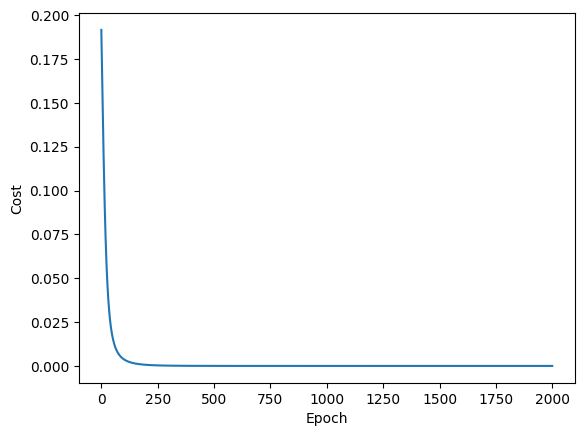

In [8]:
t = np.arange(0, epochs)
plt.plot(t, cost_list)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

## After 2000 epochs:
- b1: 0.4000
- b2: 0.4000
- b3: 0.6000
- b4: 0.6000
- w1: 0.4981
- w2: 0.5494
- w3: 0.8123
- w4: 0.6886
- w6: 1.0486
- w7: -1.8050
- w8: -1.9389
- w9: 1.0895

- O1out: 0.899996
- O2out: 0.100003

- Actual O1: 0.9
- Actual O2: 0.1